## Pivot table

We have seen how the ``GroupBy`` abstraction lets us explore relationships within a dataset.
A *pivot table* is a similar operation that is commonly seen in spreadsheets and other programs that operate on tabular data.
The pivot table takes simple column-wise data as input, and groups the entries into a two-dimensional table that provides a multidimensional summarization of the data.
The difference between pivot tables and ``GroupBy`` can sometimes cause confusion; it helps me to think of pivot tables as essentially a *multidimensional* version of ``GroupBy`` aggregation.
That is, you split-apply-combine, but both the split and the combine happen across not a one-dimensional index, but across a two-dimensional grid.

In [ ]:
# Start writing code here...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
titanic = sns.load_dataset("titanic")

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [ ]:
titanic.groupby(['sex','class'])['survived'].agg('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [ ]:
titanic.groupby(['sex','class'])[['survived']].agg('mean')

survived
sex    class           
female First   0.968085
       Second  0.921053
       Third   0.500000
male   First   0.368852
       Second  0.157407
       Third   0.135447

df.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False, sort=True)

In [ ]:
titanic.pivot_table('survived',index='sex',columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [ ]:
age_cut = pd.cut(titanic['age'],[0,18,50,100])
titanic.pivot_table('survived',['sex',age_cut],'class')

class                First    Second     Third
sex    age                                    
female (0, 18]    0.909091  1.000000  0.511628
       (18, 50]   0.967213  0.912281  0.413793
       (50, 100]  1.000000  0.666667  1.000000
male   (0, 18]    0.800000  0.600000  0.215686
       (18, 50]   0.442857  0.069444  0.139896
       (50, 100]  0.192308  0.083333  0.000000

In [ ]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age_cut,'class'], [fare])

fare                     (-0.001, 14.454]  (14.454, 512.329]
sex    age       class                                      
female (0, 18]   First                NaN           0.909091
                 Second          1.000000           1.000000
                 Third           0.714286           0.318182
       (18, 50]  First                NaN           0.967213
                 Second          0.916667           0.909091
                 Third           0.428571           0.391304
       (50, 100] First                NaN           1.000000
                 Second          0.000000           1.000000
                 Third           1.000000                NaN
male   (0, 18]   First                NaN           0.800000
                 Second          0.000000           0.818182
                 Third           0.260870           0.178571
       (18, 50]  First           0.000000           0.469697
                 Second          0.095238           0.033333
                 Third           0.131737           0.192308
       (50, 100] First                NaN           0.192308
                 Second          0.111111           0.000000
                 Third           0.000000                NaN

In [ ]:
titanic.pivot_table(index='sex', columns='class',
                    aggfunc={'survived':sum,'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [ ]:
titanic.pivot_table(index='sex', columns='class',margins=True)

adult_male                                      age             \
class       First    Second     Third       All      First     Second   
sex                                                                     
female   0.000000  0.000000  0.000000  0.000000  34.611765  28.722973   
male     0.975410  0.916667  0.919308  0.925532  41.281386  30.740707   
All      0.509554  0.200000  0.400000  0.478022  37.544076  25.266667   

                                 alone            ... pclass            \
class       Third        All     First    Second  ...  Third       All   
sex                                               ...                    
female  21.750000  32.676136  0.361702  0.421053  ...      3  1.215909   
male    26.507589  38.382128  0.614754  0.666667  ...      3  1.170213   
All     21.000000  35.623187  0.407643  0.666667  ...      3  1.192308   

           sibsp                                survived                      \
class      First    Second     Third       All     First    Second     Third   
sex                                                                            
female  0.553191  0.486842  0.895833  0.534091  0.968085  0.921053  0.500000   
male    0.311475  0.342593  0.498559  0.404255  0.368852  0.157407  0.135447   
All     0.490446  0.400000  0.200000  0.467033  0.675159  0.800000  0.500000   

                  
class        All  
sex               
female  0.931818  
male    0.436170  
All     0.675824  

[3 rows x 32 columns]

In [ ]:
births = pd.read_csv("https://raw.githubusercontent.com/reddyprasade/DataSet-for-ML-and-Data-Science/master/DataSets/births.csv")
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [ ]:
births['decade'] = 10 * (births['year']//10)

In [ ]:
births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


In [ ]:
births.pivot_table('births',index='decade',columns='gender',aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


<AxesSubplot:xlabel='decade'>

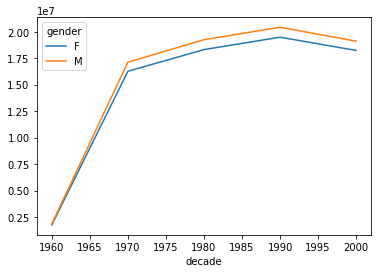

In [ ]:
births.pivot_table('births',index='decade',columns='gender',aggfunc='sum').plot()

<AxesSubplot:xlabel='year'>

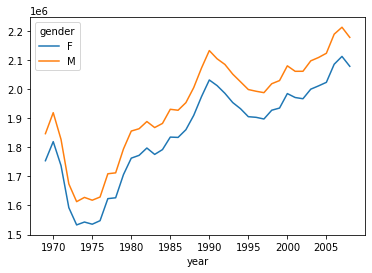

In [ ]:
births.pivot_table('births',index='year',columns='gender',aggfunc='sum').plot()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f5f90ba1-3290-463e-8fc6-44108f4fa21b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>